# Aula: Estatística descritiva com pandas

**Média, mediana, desvio‑padrão, _z-score_, quartis, quintis e decis**

> Curso: Introdução à análise de dados com Python (Ciências Sociais)

Nesta aula vamos **ler um banco de dados**, **olhar as variáveis** e calcular as medidas descritivas básicas. O roteiro é simples e cada célula faz **uma coisa por vez**.

## 1) Preparação
Vamos importar as bibliotecas que usaremos.

In [2]:
import pandas as pd
import numpy as np

## 2) Ler o banco
O arquivo desta aula chama‑se `AtlasBrasil.dta` (formato **Stata**)

In [64]:
df = pd.read_stata('AtlasBrasil.dta')

/var/folders/j_/tz9gc8yj4q353002z3gl5_500000gn/T/ipykernel_22563/1589818210.py:1: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df = pd.read_stata('AtlasBrasil.dta')


## 3) Olhar as variáveis
Primeiro, veja quantas linhas e colunas temos; depois, os nomes das variáveis.

In [33]:
df.shape

(5566, 22)

In [34]:
df.columns.tolist()

['municipio',
 'ibge',
 'gini_1991',
 'gini_2000',
 'gini_2010',
 'pop_1991',
 'pop_2000',
 'pop_2010',
 'IDHM_1991',
 'IDHM_2000',
 'IDHM_2010',
 'rpc1991',
 'rpc_2000',
 'rpc_2010',
 'analfa18_1991',
 'analfa18_2000',
 'analfa18_2010',
 'trab_publico2010',
 'trab_publico2000',
 'log_pop2010',
 'log_pop2000',
 'log_pop1991']

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5566 entries, 0 to 5565
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   municipio         5566 non-null   object 
 1   ibge              5565 non-null   float64
 2   gini_1991         5565 non-null   float64
 3   gini_2000         5565 non-null   float64
 4   gini_2010         5565 non-null   float64
 5   pop_1991          5565 non-null   float64
 6   pop_2000          5565 non-null   float64
 7   pop_2010          5565 non-null   float64
 8   IDHM_1991         5565 non-null   float64
 9   IDHM_2000         5565 non-null   float64
 10  IDHM_2010         5565 non-null   float64
 11  rpc1991           5565 non-null   float64
 12  rpc_2000          5565 non-null   float64
 13  rpc_2010          5565 non-null   float64
 14  analfa18_1991     5565 non-null   float32
 15  analfa18_2000     5565 non-null   float32
 16  analfa18_2010     5565 non-null   float32


Agora, liste apenas as variáveis **numéricas** (as que aceitam média, mediana etc.).

In [36]:
cols_numericas = df.select_dtypes(include='number').columns.tolist()
cols_numericas

['ibge',
 'gini_1991',
 'gini_2000',
 'gini_2010',
 'pop_1991',
 'pop_2000',
 'pop_2010',
 'IDHM_1991',
 'IDHM_2000',
 'IDHM_2010',
 'rpc1991',
 'rpc_2000',
 'rpc_2010',
 'analfa18_1991',
 'analfa18_2000',
 'analfa18_2010',
 'trab_publico2010',
 'trab_publico2000',
 'log_pop2010',
 'log_pop2000',
 'log_pop1991']

## 4) Escolher **uma** variável numérica


Para evitar problemas com valores ausentes (**NA**), vamos criar uma **série** apenas com os números válidos.

In [37]:
s = df['rpc_2010'].dropna()
s.describe()  # resumo rápido

count      5565.000000
mean      49360.561725
std       24326.933326
min        9625.000000
25%       28112.000000
50%       46765.000000
75%       65062.000000
max      204374.000000
Name: rpc_2010, dtype: float64

## 5) Medidas centrais e de dispersão
- **Média**: valor médio.
- **Mediana**: ponto que separa a metade de baixo e a metade de cima.
- **Desvio‑padrão**: mede a **dispersão** (quanto os dados variam em torno da média).

In [38]:
media = s.mean()
mediana = s.median()
desvio = s.std()  # amostral (ddof=1)
print('Média   :', media)
print('Mediana :', mediana)
print('Desvio‑padrão:', desvio)

Média   : 49360.56172506738
Mediana : 46765.0
Desvio‑padrão: 24326.933326461476


## 6) _Z-score_ (padronização)
O _z-score_ transforma cada valor **x** em **desvios‑padrão** a partir da média:

$$ z = \frac{x - \bar{x}}{s} $$

- `z > 0` ⇒ valor **acima** da média.
- `z < 0` ⇒ valor **abaixo** da média.
- `z = 1` ⇒ **um** desvio‑padrão acima; `z = -2` ⇒ **dois** abaixo.

### Calcular o z-score da populacao e colocar os dados no banco

In [47]:
#Base Brasil inteira

df = df.assign(
    z_brasil = (df["rpc_2010"] - df["rpc_2010"].mean()) / df["rpc_2010"].std()
)

df.head()

,municipio,ibge,gini_1991,gini_2000,gini_2010,pop_1991,pop_2000,pop_2010,IDHM_1991,IDHM_2000,IDHM_2010,rpc1991,rpc_2000,rpc_2010,analfa18_1991,analfa18_2000,analfa18_2010,trab_publico2010,trab_publico2000,log_pop2010,log_pop2000,log_pop1991,z_brasil
0,Acrelândia (AC),120001.0,60.0,63.0,54.0,6723.0,9617.0,12538.0,247.0,451.0,604.0,22365.0,26877.0,30376.0,41.560001,28.879999,17.110001,0.98,7.28,9.436520,9.171288,8.813290,-0.780393
1,Assis Brasil (AC),120005.0,48.0,60.0,61.0,4269.0,4676.0,6072.0,314.0,425.0,588.0,17852.0,19963.0,29133.0,44.849998,33.799999,22.420000,9.14,3.22,8.711443,8.450198,8.359135,-0.831488
2,Brasiléia (AC),120010.0,56.0,60.0,58.0,13292.0,15656.0,21398.0,336.0,476.0,614.0,17676.0,27715.0,37607.0,40.619999,25.510000,19.580000,7.92,12.91,9.971053,9.658609,9.494918,-0.483150
3,Bujari (AC),120013.0,51.0,64.0,58.0,3196.0,6227.0,8471.0,267.0,460.0,589.0,19484.0,23886.0,34095.0,48.110001,40.880001,26.780001,8.97,1.29,9.044404,8.736650,8.069655,-0.627517
4,Capixaba (AC),120017.0,48.0,55.0,56.0,2312.0,5206.0,8798.0,183.0,365.0,575.0,19572.0,22736.0,33617.0,50.669998,39.759998,23.840000,0.30,6.76,9.082280,8.557567,7.745868,-0.647166


In [48]:
# Filtrar Nova Friburgo
df.query("municipio.str.contains('Nova Friburgo')")[["municipio","pop_2010","z_brasil"]]

,municipio,pop_2010,z_brasil
3639,Nova Friburgo (RJ),182082.0,1.648972


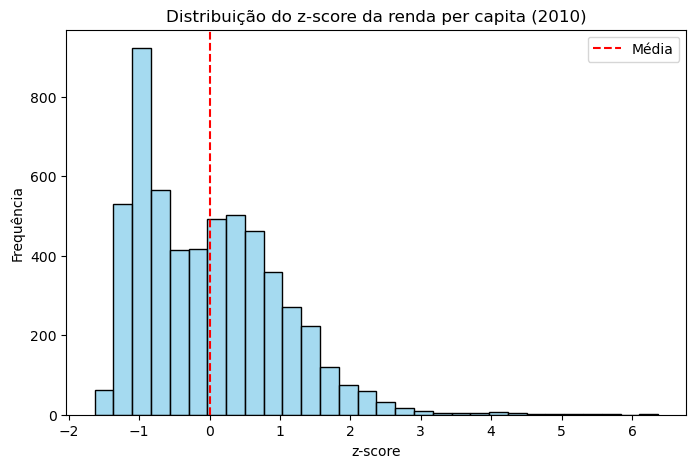

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma focado no intervalo -3 a 3
plt.figure(figsize=(8,5))
sns.histplot(df["z_brasil"], bins=30, color="skyblue")

plt.title("Distribuição do z-score da renda per capita (2010)")
plt.xlabel("z-score")
plt.ylabel("Frequência")

plt.axvline(0, color="red", linestyle="--", label="Média")

plt.legend()
plt.show()


## 7) Quartis, quintis e decis (**pontos de corte**)
- **Quartis**: dividem os dados em 4 partes iguais (25%, 50%, 75%).
- **Quintis**: 5 partes (20%, 40%, 60%, 80%).
- **Decis**: 10 partes (10%, 20%, …, 90%).

In [54]:
# Quartis (pontos de corte)
quartis = s.quantile([0.25, 0.50, 0.75])
quartis

0.25    28112.0
0.50    46765.0
0.75    65062.0
Name: rpc_2010, dtype: float64

In [55]:
# Quintis (pontos de corte)
quintis = s.quantile([0.20, 0.40, 0.60, 0.80])
quintis

0.2    26134.8
0.4    37713.6
0.6    54332.4
0.8    69444.6
Name: rpc_2010, dtype: float64

In [56]:
# Decis (pontos de corte)
decis = s.quantile(np.linspace(0.10, 0.90, 9))
decis

0.1    22355.4
0.2    26134.8
0.3    30374.4
0.4    37713.6
0.5    46765.0
0.6    54332.4
0.7    61452.4
0.8    69444.6
0.9    81434.6
Name: rpc_2010, dtype: float64

## 8) Criar **faixas** (rótulos) com `qcut`
Aqui vamos transformar a variável em **categorias** (por posição na distribuição). Isso é útil para comparar grupos.

In [66]:
var = "pop_2010"

df_temp = df.assign(
    quartil = pd.qcut(df[var], 4, labels=["Q1","Q2","Q3","Q4"])
)[["municipio", var, "quartil"]]   # 👈  na ordem certa

df_temp.head()


,municipio,pop_2010,quartil
0,Acrelândia (AC),12538.0,Q3
1,Assis Brasil (AC),6072.0,Q2
2,Brasiléia (AC),21398.0,Q3
3,Bujari (AC),8471.0,Q2
4,Capixaba (AC),8798.0,Q2


In [67]:
df = df.assign(
    quartil = pd.qcut(df[var], 4, labels=["Q1","Q2","Q3","Q4"])
)

df.head()

,municipio,ibge,gini_1991,gini_2000,gini_2010,pop_1991,pop_2000,pop_2010,IDHM_1991,IDHM_2000,IDHM_2010,rpc1991,rpc_2000,rpc_2010,analfa18_1991,analfa18_2000,analfa18_2010,trab_publico2010,trab_publico2000,log_pop2010,log_pop2000,log_pop1991,quartil
0,Acrelândia (AC),120001.0,60.0,63.0,54.0,6723.0,9617.0,12538.0,247.0,451.0,604.0,22365.0,26877.0,30376.0,41.560001,28.879999,17.110001,0.98,7.28,9.436520,9.171288,8.813290,Q3
1,Assis Brasil (AC),120005.0,48.0,60.0,61.0,4269.0,4676.0,6072.0,314.0,425.0,588.0,17852.0,19963.0,29133.0,44.849998,33.799999,22.420000,9.14,3.22,8.711443,8.450198,8.359135,Q2
2,Brasiléia (AC),120010.0,56.0,60.0,58.0,13292.0,15656.0,21398.0,336.0,476.0,614.0,17676.0,27715.0,37607.0,40.619999,25.510000,19.580000,7.92,12.91,9.971053,9.658609,9.494918,Q3
3,Bujari (AC),120013.0,51.0,64.0,58.0,3196.0,6227.0,8471.0,267.0,460.0,589.0,19484.0,23886.0,34095.0,48.110001,40.880001,26.780001,8.97,1.29,9.044404,8.736650,8.069655,Q2
4,Capixaba (AC),120017.0,48.0,55.0,56.0,2312.0,5206.0,8798.0,183.0,365.0,575.0,19572.0,22736.0,33617.0,50.669998,39.759998,23.840000,0.30,6.76,9.082280,8.557567,7.745868,Q2


## 10) Exercícios
1. Troque a variável e repita os cálculos. Qual é a diferença entre **média** e **mediana**?
2. Pegue um valor concreto e **calcule o z-score** à mão. O resultado bate com a coluna criada?
3. Compare a **média** da variável **dentro** de cada quartil (use `groupby` se já se sentir confortável).